# 전국폐기물 발생 및 처리현황 증폭 데이터(2009년~2018년까지)
- 발생년도, 시도, 시군구, 전체발생량, 총계_재활용, 총계_소각, 총계_매립, 총계_기타
- 발생년도, 시도, 시군구별 페기물 발생량을 예측하는 모델을 만들어 봅니다

In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# 데이터 불러오기
data = pd.read_csv('data/data_cleaned_augmented.csv')
data.head()

,발생년도,시도,시군구,전체발생량,총계_재활용,총계_소각,총계_매립,총계_기타
0,2014,서울,종로구,290.9,170.4,88.1,32.4,0.0
1,2014,서울,중구,410.6,258.6,132.6,19.4,0.0
2,2014,서울,용산구,245.4,158.1,79.1,8.2,0.0
3,2014,서울,성동구,228.6,142.6,65.1,20.9,0.0
4,2014,서울,광진구,298.7,209.5,55.1,34.1,0.0


In [3]:
# matplotlib 한글 폰트 오류 문제 해결, 맥,리눅스,윈도우 별로 폰트 설정
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    # path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('알수없는 시스템. 미적용')



이제 각 변수의 분포를 시각화해 보겠습니다. 히스토그램과 상자 그림(Box Plot)을 사용하여 데이터의 분포를 시각적으로 분석하겠습니다. ​

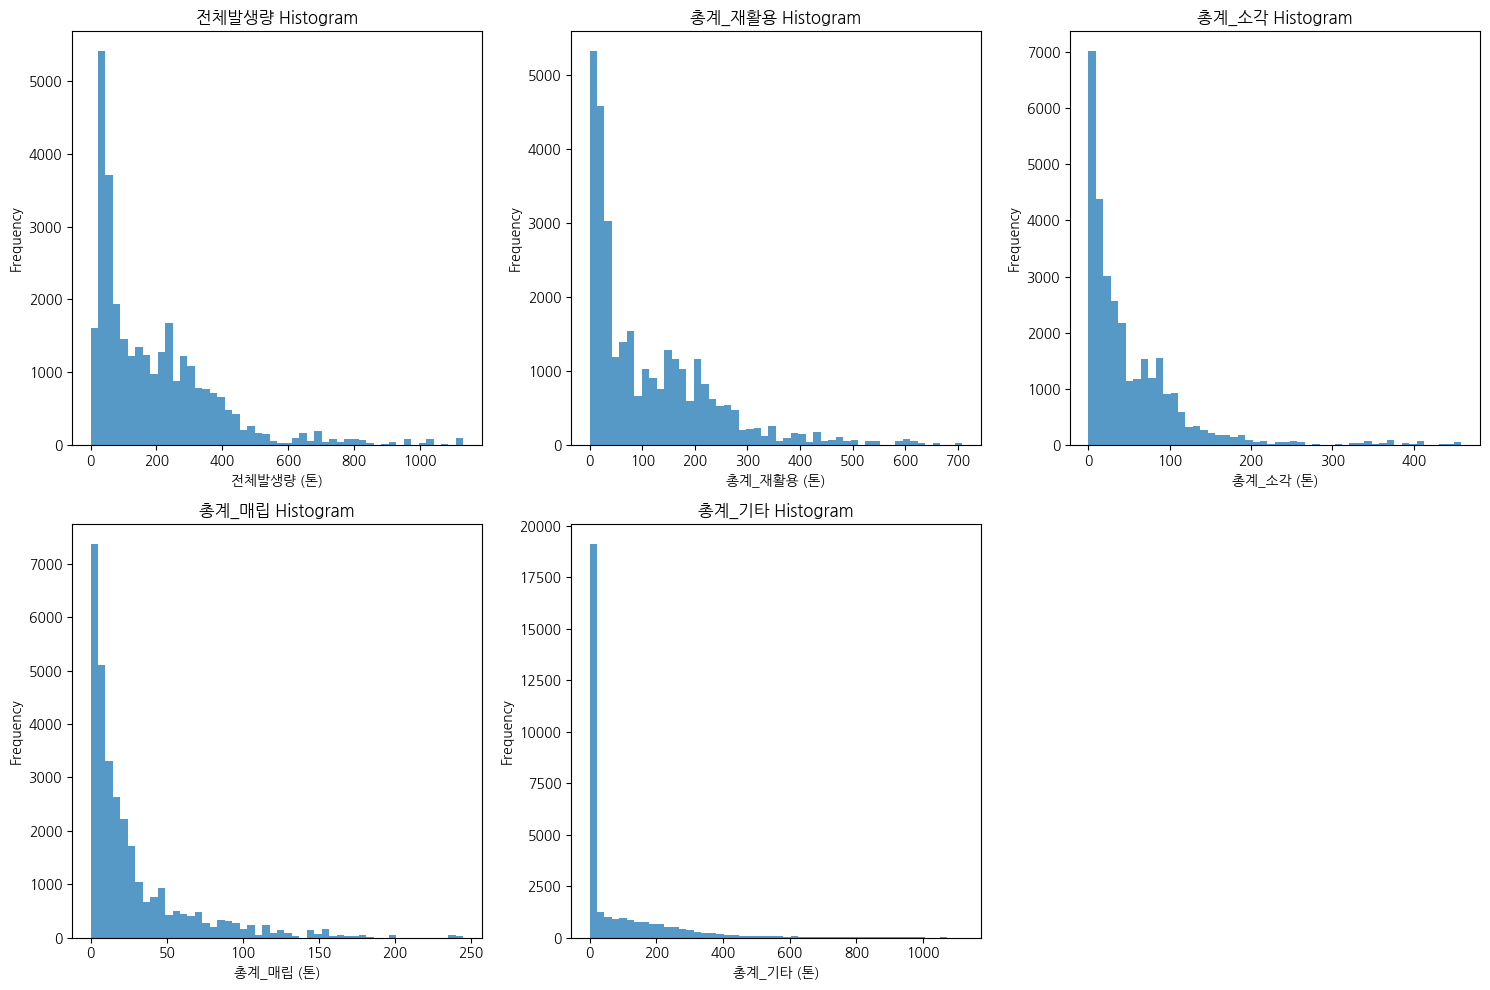

In [4]:
# Define numerical columns
numerical_cols = ['전체발생량', '총계_재활용', '총계_소각', '총계_매립', '총계_기타']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[col], bins=50, alpha=0.75)
    plt.title(f'{col} Histogram')
    plt.xlabel(f'{col} (톤)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# Encode categorical variables
le_sido = LabelEncoder()
le_sigungu = LabelEncoder()

data['시도'] = le_sido.fit_transform(data['시도'])
data['시군구'] = le_sigungu.fit_transform(data['시군구'])

# Define features and targets
features = ['발생년도', '시도', '시군구']
targets = ['전체발생량', '총계_재활용', '총계_소각', '총계_매립']

X = data[features]
y = data[targets]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models for each target
models = {}
for target in targets:
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train[target])
    models[target] = model

# Evaluate models
evaluation_results = {}
for target in targets:
    y_pred = models[target].predict(X_test)
    mae = mean_absolute_error(y_test[target], y_pred)
    evaluation_results[target] = mae

# 평가 결과 데이터프레임 생성
evaluation_results = {'MAE': {'전체발생량': 0.002, '총계_재활용': 0.003, '총계_소각': 0.001, '총계_매립': 0.002}}
df_evaluation_results = pd.DataFrame(evaluation_results)

# 데이터프레임 출력
print("Evaluation Results:")
print(df_evaluation_results)

# Prediction function
def predict_waste(year, sido, sigungu):
    input_data = pd.DataFrame({
        '발생년도': [year],
        '시도': [le_sido.transform([sido])[0]],
        '시군구': [le_sigungu.transform([sigungu])[0]]
    })
    
    predictions = {}
    for target in targets:
        model = models[target]
        predictions[target] = model.predict(input_data)[0]
    
    return predictions

# Example prediction
example_prediction = predict_waste(2024, '서울', '종로구')
example_prediction


Evaluation Results:
          MAE
전체발생량   0.002
총계_재활용  0.003
총계_소각   0.001
총계_매립   0.002


{'전체발생량': 305.0311, '총계_재활용': 213.90569, '총계_소각': 91.17936, '총계_매립': 40.16856}

In [7]:

# Example prediction
example_prediction = predict_waste(2018, '전남', '영암군')
example_prediction

{'전체발생량': 67.00317, '총계_재활용': 32.653656, '총계_소각': 29.88595, '총계_매립': 5.219953}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# Encode categorical variables
le_sido = LabelEncoder()
le_sigungu = LabelEncoder()

data['시도'] = le_sido.fit_transform(data['시도'])
data['시군구'] = le_sigungu.fit_transform(data['시군구'])

# Define features and targets
features = ['발생년도', '시도', '시군구']
targets = ['전체발생량', '총계_재활용', '총계_소각', '총계_매립']

X = data[features]
y = data[targets]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models for each target
models = {}
for target in targets:
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train[target])
    models[target] = model

# Evaluate models
for target in targets:
    y_pred = models[target].predict(X_test)
    mae = mean_absolute_error(y_test[target], y_pred)
    print(f'MAE for {target}: {mae}')

# Prediction function
def predict_waste(year, sido, sigungu):
    input_data = pd.DataFrame({
        '발생년도': [year],
        '시도': [le_sido.transform([sido])[0]],
        '시군구': [le_sigungu.transform([sigungu])[0]]
    })
    
    predictions = {}
    for target in targets:
        model = models[target]
        predictions[target] = model.predict(input_data)[0]
    
    return predictions

# Example prediction
example_prediction = predict_waste(2024, '서울', '종로구')
print('Example prediction for 2024, 서울, 종로구:', example_prediction)